# Exploratory Data Analysis on Ecommerce Customer Dataset

In [195]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif', width = 800)

Hello geeks! 
I am trying do an extensive analysis of Ecommerece customer data which I have sourced from kaggle. Am trying to cover all the basis which is necessory for any exploratory data analysis technique. The data which I am using is in small amaount but we will try do get as much insites as we can. In order to download this data you can click on this link or download the csv file from my repository.
    In this practice i will try to perform EDA using Univariate Analysis , Bivariate Analysis and Multivariate Analysis, outlier detection and imputation, correlation etc.
    Download the copy of the data here https://www.kaggle.com/code/pouyaaskari/ecommerce-customers-linearregression/data

In [ ]:
import pandas as pd #for data handling in various formats like csv, xlsx, tsv, etc
import numpy as np  #for numerical data handling and manupulation
import matplotlib.pyplot as plt # for visualization on data on different graphs
%matplotlib inline
import seaborn as sns # for advance graph ploting technique

In [120]:
ecom =  pd.read_csv("Ecommerce Customers (2).csv") #reading the data and assigning the name ecom

In [121]:
ecom # looking inside the data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## Exploring the given data 

In [122]:
ecom.shape # checking dimension of the data

(500, 8)

In [123]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [124]:
ecom.info() # Checking basic information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [125]:
ecom.describe() # looking for the spread of the data for higher level of understanding

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [126]:
ecom.isnull().sum() # Checking for null or unavailable data block

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [127]:
ecom = ecom.drop(["Email", "Address", "Avatar"], axis = 1) # Dropping unnecessory data columns for further operation

In [128]:
ecom

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [129]:
ecom.duplicated().sum() # Checking for repeated values, if any

0

In [130]:
ecom.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [131]:
ecom.isna().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Univariate Analysis

In [132]:
ecom.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

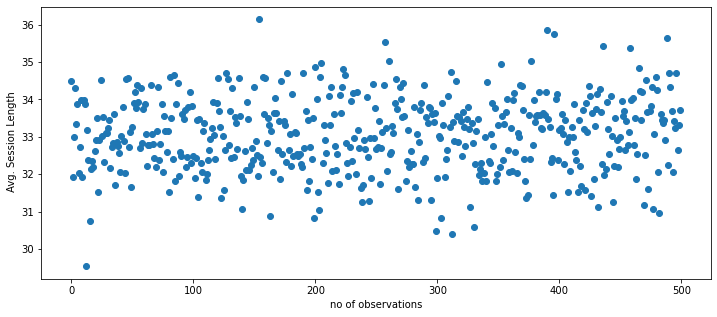

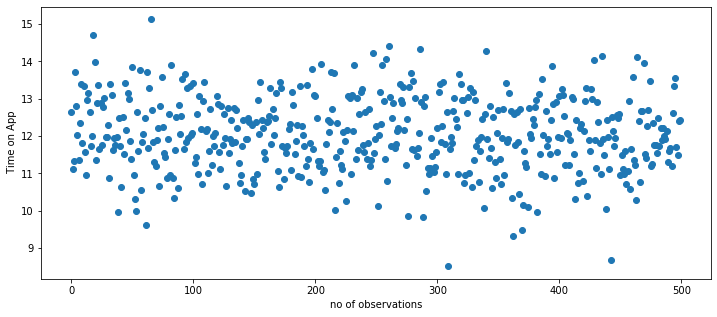

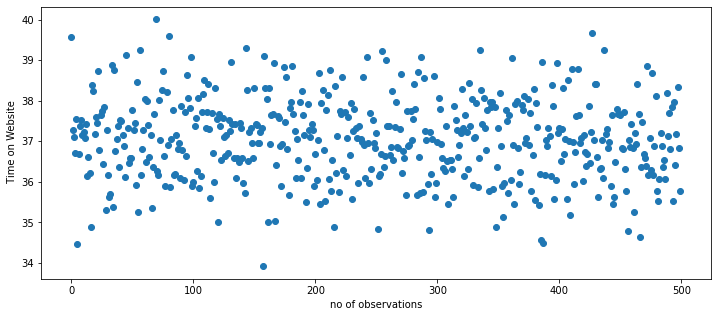

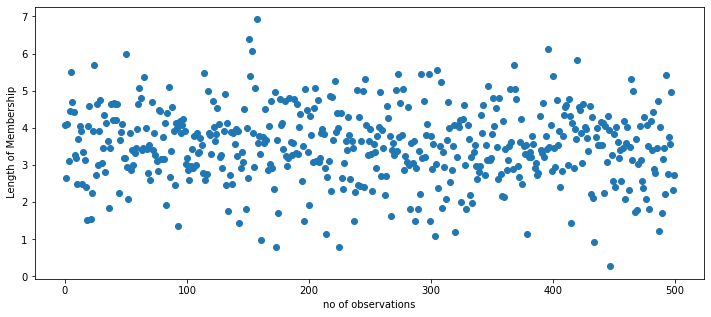

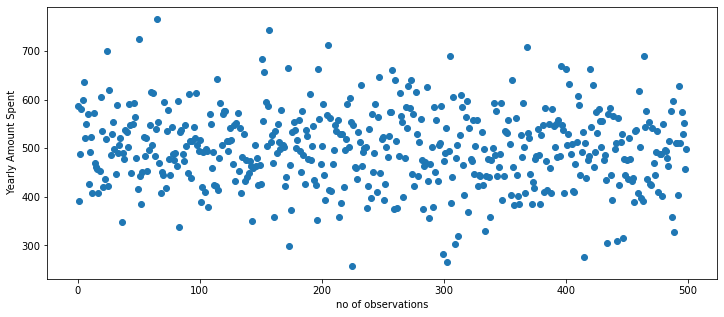

In [133]:
# Finding all possible reations with total observation with all columns
for i in ecom.columns:
    plt.figure(figsize=(12,5))
    plt.scatter(ecom.index, ecom[i])
    plt.ylabel(f" {i}")
    plt.xlabel("no of observations")
    plt.show()


## Bivariate Analysis 

In [134]:
ecom.dtypes

Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [135]:
# looking for categorical variables
for i in ecom.columns:
    print("\n",ecom[i].unique)


 <bound method Series.unique of 0      34.497268
1      31.926272
2      33.000915
3      34.305557
4      33.330673
         ...    
495    33.237660
496    34.702529
497    32.646777
498    33.322501
499    33.715981
Name: Avg. Session Length, Length: 500, dtype: float64>

 <bound method Series.unique of 0      12.655651
1      11.109461
2      11.330278
3      13.717514
4      12.795189
         ...    
495    13.566160
496    11.695736
497    11.499409
498    12.391423
499    12.418808
Name: Time on App, Length: 500, dtype: float64>

 <bound method Series.unique of 0      39.577668
1      37.268959
2      37.110597
3      36.721283
4      37.536653
         ...    
495    36.417985
496    37.190268
497    38.332576
498    36.840086
499    35.771016
Name: Time on Website, Length: 500, dtype: float64>

 <bound method Series.unique of 0      4.082621
1      2.664034
2      4.104543
3      3.120179
4      4.446308
         ...   
495    3.746573
496    3.576526
497    4.958264
498    

### We can see that there are no categorical variables are here to operate.

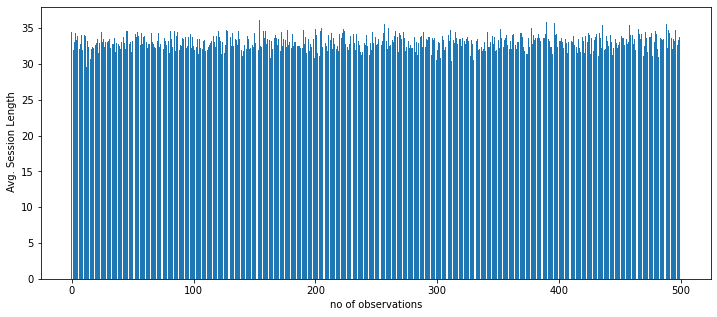

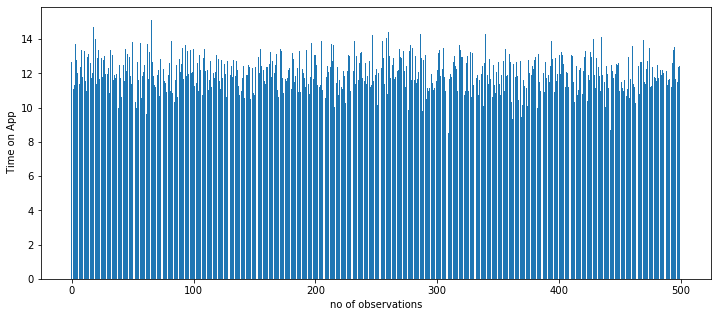

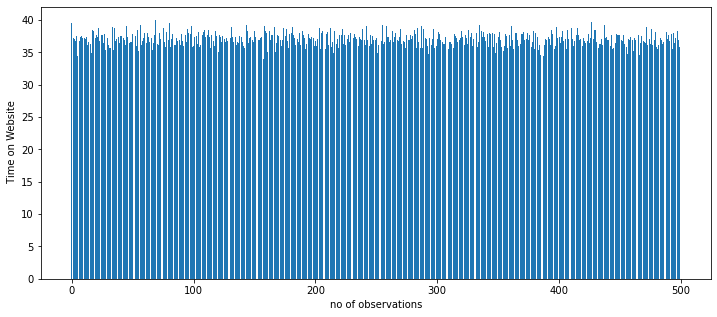

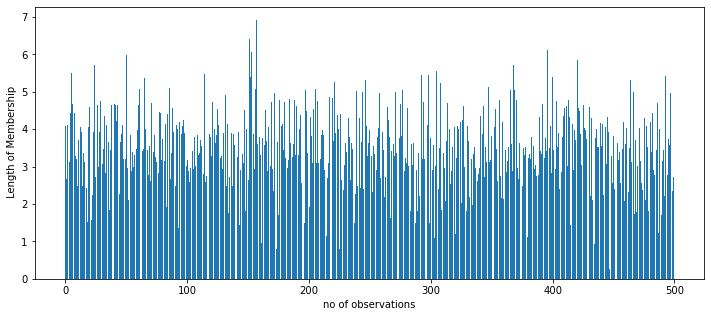

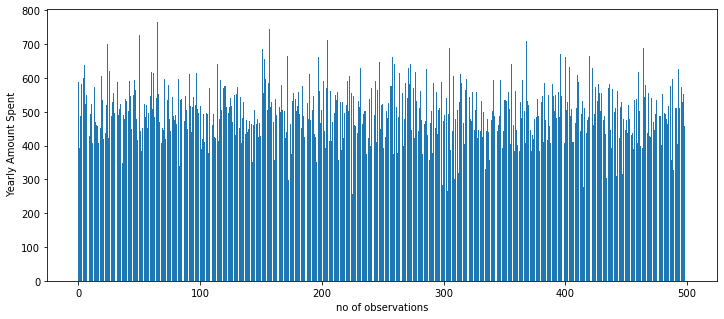

In [136]:
for i in ecom.columns:
    plt.figure(figsize=(12,5))
    plt.bar(ecom.index, ecom[i])
    plt.ylabel(f" {i}")
    plt.xlabel("no of observations")
    plt.show()

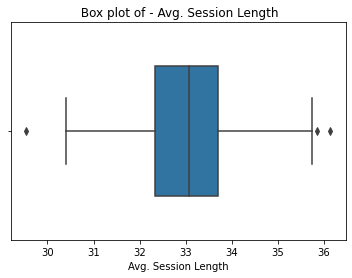

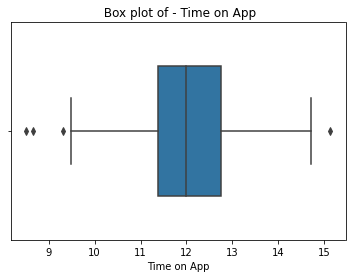

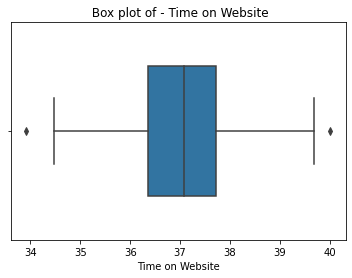

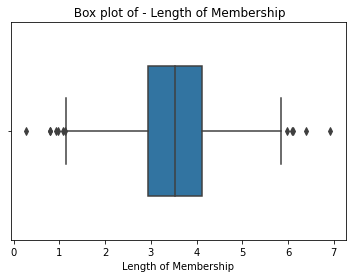

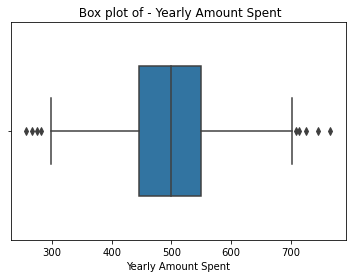

In [137]:
# looking for outliers using boxplot
for i in ecom.columns:
    sns.boxplot(x=ecom[i],width = .6).set_title(f" Box plot of - {i}")
    plt.show()
    

### Outlier Detection 

In [138]:
def outlr(data, var):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    lowr_lim = q1-(1.5*iqr)
    upp_lim = q3+(1.5*iqr)
    data_outlr = data[(data[i]<lowr_lim) | (data[i]>upp_lim)][i].values
    print(f"Outliers detected in the given dataset in column {i} is \n {data_outlr}")
    

In [139]:
for i in ecom.columns:
    outlr(ecom,i)

Outliers detected in the given dataset in column Avg. Session Length is 
 [29.53242897 36.13966249 35.86023651]
Outliers detected in the given dataset in column Time on App is 
 [15.12699429  8.50815218  9.3162892   8.66834952]
Outliers detected in the given dataset in column Time on Website is 
 [40.00518164 33.91384725]
Outliers detected in the given dataset in column Length of Membership is 
 [5.97676813 6.40122884 6.07665364 6.92268934 0.96862212 0.80151572
 0.78951991 1.0845853  1.13047696 6.11519895 0.9364976  0.26990109]
Outliers detected in the given dataset in column Yearly Amount Spent is 
 [725.58481406 765.51846194 744.2218671  712.39632681 256.67058229
 282.47124572 266.08634095 708.93518487 275.91842065]


In [151]:

def outlr_remov(data, var):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    lowr_lim = q1-(1.5*iqr)
    upp_lim = q3+(1.5*iqr)
    data = data[(data[i]>lowr_lim) & (data[i]<upp_lim)]
    return data

In [152]:
for i in ecom.columns:
    ecom = outlr_remov(ecom, i)

In [153]:
ecom

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [154]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   474 non-null    float64
 1   Time on App           474 non-null    float64
 2   Time on Website       474 non-null    float64
 3   Length of Membership  474 non-null    float64
 4   Yearly Amount Spent   474 non-null    float64
dtypes: float64(5)
memory usage: 22.2 KB


In [156]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,474.000000,474.000000,474.000000,474.000000,474.000000
mean,33.037405,12.066937,37.070146,3.547496,500.404266
std,0.943465,0.956327,0.996848,0.888891,69.000831
min,30.393185,9.477778,34.476878,1.200484,319.928870
25%,32.344967,11.395923,36.361896,2.967329,448.488642
50%,33.077133,11.983231,37.075583,3.535445,501.111368
75%,33.699025,12.760941,37.717324,4.115562,548.137737
max,35.630854,14.715388,39.672591,5.840506,689.787604


### Multivariate Analysis

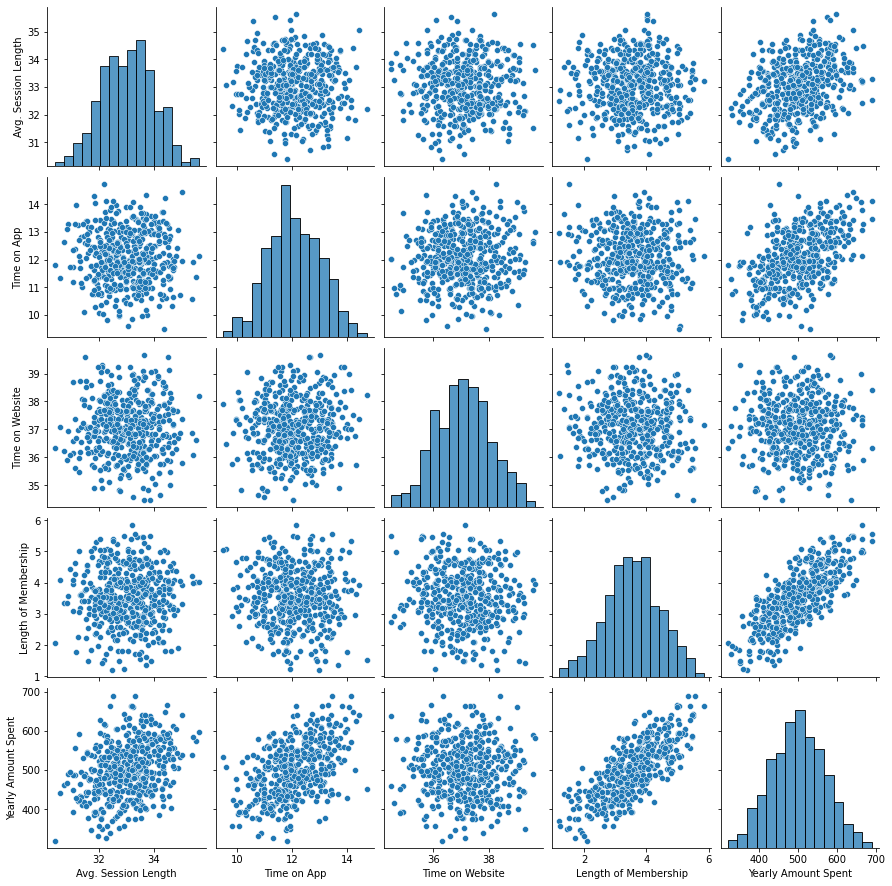

In [158]:
sns.pairplot(ecom)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


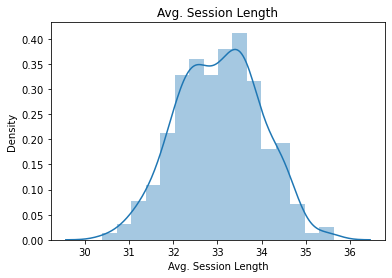

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


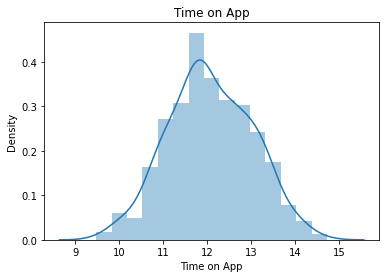

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


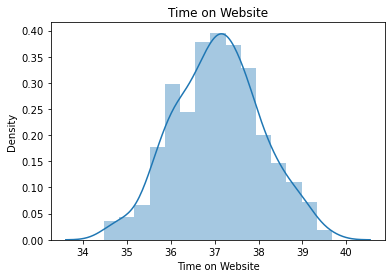

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


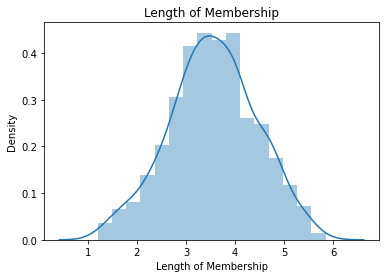

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


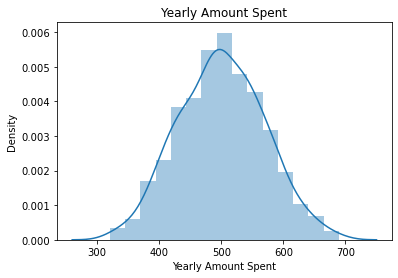

In [162]:
for i in ecom.columns:
    #fig, axes = plt.subplots(1, 2)
    #fig.suptitle('1 row x 2 columns axes with no data')
    fig=sns.distplot(ecom[i]);
    fig.set_title(f"{i}")
    plt.show()
    


In [163]:
ecom.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.039729,-0.007856,0.000236,0.331589
Time on App,-0.039729,1.000000,0.065066,-0.055699,0.480231
Time on Website,-0.007856,0.065066,1.000000,-0.053180,-0.005199
Length of Membership,0.000236,-0.055699,-0.053180,1.000000,0.761956
Yearly Amount Spent,0.331589,0.480231,-0.005199,0.761956,1.000000


<AxesSubplot:>

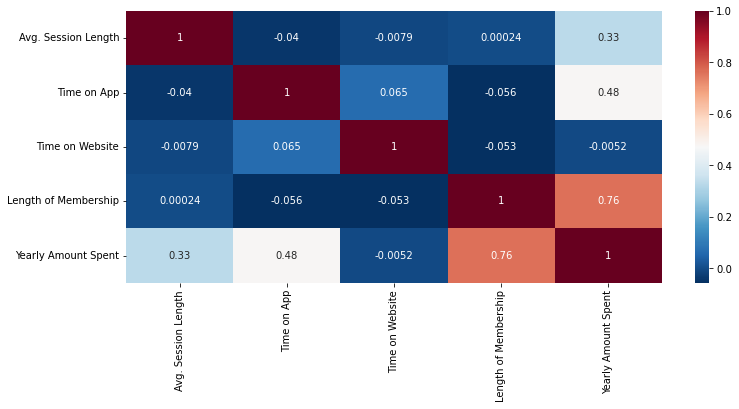

In [170]:
plt.figure(figsize = (12,5))
sns.heatmap(ecom.corr(),annot=True,cmap='RdBu_r')

<Figure size 864x360 with 0 Axes>

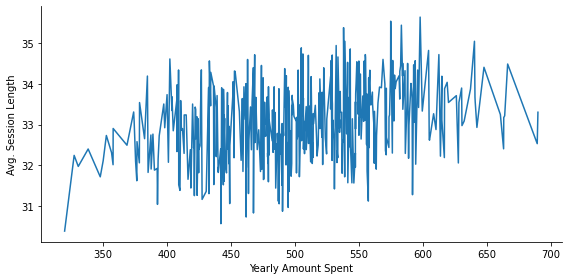

<Figure size 864x360 with 0 Axes>

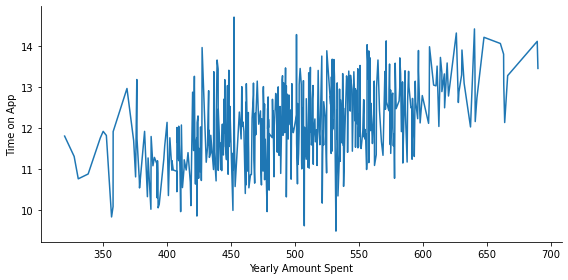

<Figure size 864x360 with 0 Axes>

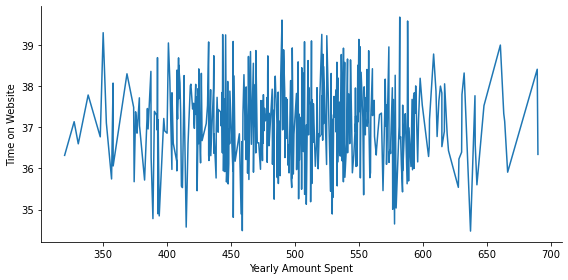

<Figure size 864x360 with 0 Axes>

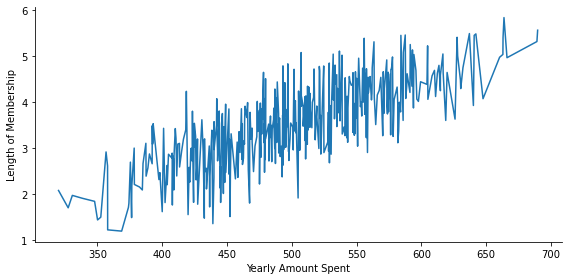

<Figure size 864x360 with 0 Axes>

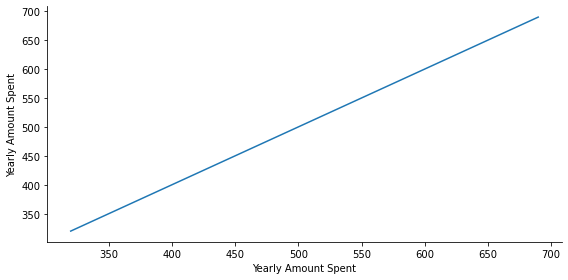

In [185]:
for i in ecom.columns:
    plt.figure(figsize = (12,5))
    sns.relplot(x = ecom['Yearly Amount Spent'] , y = ecom[i] ,height=4,kind='line', aspect=2)
    plt.show()